In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)

In [ ]:
#Data preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Temp']])

In [ ]:
def prepare_data(series, seq_length):
    data = []
    labels = []
    for i in range(seq_length, len(series)):      #30 -> end
        data.append(series[i-seq_length:i, 0])    #[]  33. ->.  3:33
        labels.append(series[i, 0])
#     print(f"data : {data}")
#     print(f"labels : {labels}")
    return np.array(data), np.array(labels)

# prepare_data(scaled_data, 30)

In [ ]:
#we will look at past 30 dats to predict nect data day data
seq_length = 30     #month-month
X, y = prepare_data(scaled_data, seq_length)

In [ ]:
# @sample, tiome spes, featr
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [ ]:
#lstm
model = models.Sequential()
model.add(layers.LSTM(50, return_sequences=True, input_shape=(seq_length,1)))
model.add(layers.LSTM(30, return_sequences= False))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size = 32, validation_split=0.20)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0499 - val_loss: 0.0109
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - val_loss: 0.0106
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - val_loss: 0.0098
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - val_l

In [ ]:
predicted_temp = model.predict(X_test)
# predicted_temp

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
predicted_temp = scaler.inverse_transform(predicted_temp.reshape(-1,1))
# predicted_temp

# # original form.   ->

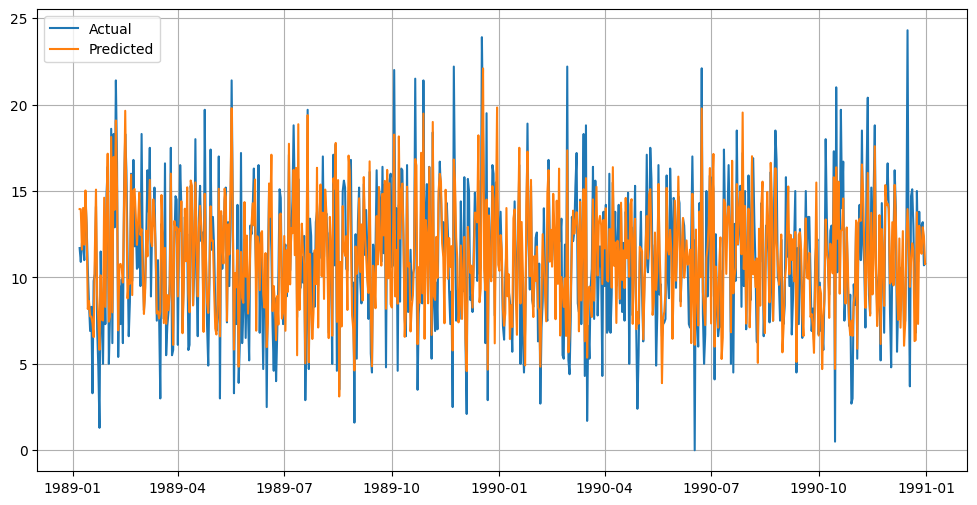

In [ ]:
plt.figure(figsize=(12,6)) #sizing the canvas
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual')
plt.plot(df.index[-len(y_test):], predicted_temp , label='Predicted')
plt.legend()
plt.grid()

In [ ]:
### project

# from google.colab import files
# uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

#machine learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# data = pd.read_csv("Reviews.csv")

In [ ]:
data = pd.read_csv("/content/Reviews.csv", on_bad_lines='skip', quoting=3)
data = data[:10000]  #remove this line when you folks are running the code (request)
data.head(1)

<ipython-input-35-a6484c208c01>:1: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Reviews.csv", on_bad_lines='skip', quoting=3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [ ]:
#basic level analysis - fairly large
print(f"Data Shape is : {data.shape}")
print(f"Missing Values")
print(data.isna().sum())

Data Shape is : (10000, 10)
Missing Values
Id                        0
ProductId                 0
UserId                    0
ProfileName               2
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [ ]:
data = data.dropna()

print(f"Missing Values")
print(data.isna().sum())

Missing Values
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [ ]:
#sampling

data['Summary'][18:25]

,Summary
18,Awesome Deal!
19,stale product.
20,great source of electrolytes
21,Great for preventing cramps
22,Low Carb Alternative to Gatorade
23,pretzel haven!
24,nothing special


In [ ]:
#excel ->

data['Text'][22]

'"For those of us on a low carb diet these little tablets are just the thing.<br /><br />Two years ago I started cycling again after many years but was having heart arrhythmia after longer rides in high heat.  I was drinking plain water but did a little research and thought electrolytes might be the issue.  Gatorade wasn\'t an option because it is so loaded with carbohydrates so I looked around for a low-carb alternative.  The ""zero carb"" sports drinks didn\'t help so what to do?  One day I ran across these at my bike shop so tried a tube of them.....voila!...problem solved!!<br /><br />I\'ve shared them with two friends in particular whose problems with leg cramps were resolved while using these.<br /><br />These guys got it right -- they are superbly formulated and simply work....."'

In [ ]:
# This product serves me well as a source of electrolytes during and
# after a long run or bike ride.<br />I have tried all of the flavors
# but really do like the grapefruit flavor... no after-taste and
# I actually like the slight carbonation.<br />I use other Hammer products and
# really like their whole product line.

# yes - > big

# html parsing -> str -> upload

# 1) text has html tags.   - break tag
# 2) contactions can be fixed in out text
# 3) charatcets --- !!!!, ,,,,,                  text -> summary

In [ ]:
# text procewsing pipeline

def clean_html(text):
  return BeautifulSoup(text, "html.parser").get_text()

def remove_contraction(text):
  return text.replace("n't"," not").replace("n's"," is").replace("'ve"," have") #keep adding -0 contarcions

def clean_text(text):
  text = clean_html(text)
  text = remove_contraction(text)
  text = re.sub(r'\d+','',text)   #remove numbers
  text = re.sub(r'[^\w\s]', '', text) #remove punctionation
  return text

In [ ]:
#apply
data['Text'] = data['Text'].apply(clean_text)
data['Summary'] = data['Summary'].apply(clean_text)

#swifter in pandas



<ipython-input-41-347624d67789>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [ ]:
print(f"Sample text : {data['Text'].iloc[22]}")

Sample text : For those of us on a low carb diet these little tablets are just the thingTwo years ago I started cycling again after many years but was having heart arrhythmia after longer rides in high heat  I was drinking plain water but did a little research and thought electrolytes might be the issue  Gatorade was not an option because it is so loaded with carbohydrates so I looked around for a lowcarb alternative  The zero carb sports drinks did not help so what to do  One day I ran across these at my bike shop so tried a tube of themvoilaproblem solvedI have shared them with two friends in particular whose problems with leg cramps were resolved while using theseThese guys got it right  they are superbly formulated and simply work


In [ ]:
stopwords_list = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
  #tokenize remove --> stop words --> lemma
  words = word_tokenize(text)
  words = [word for word in words if word not in stopwords_list] #list comprehension
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)

data['Text'] = data['Text'].apply(preprocess_text)
data['Summary'] = data['Summary'].apply(preprocess_text)

In [ ]:
print(f"Sample preproceesed text : {data['Text'].iloc[22]} ")

Sample preproceesed text : For u low carb diet little tablet thingTwo year ago I started cycling many year heart arrhythmia longer ride high heat I drinking plain water little research thought electrolyte might issue Gatorade option loaded carbohydrate I looked around lowcarb alternative The zero carb sport drink help One day I ran across bike shop tried tube themvoilaproblem solvedI shared two friend particular whose problem leg cramp resolved using theseThese guy got right superbly formulated simply work 


In [ ]:
data.head(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      9998 non-null   int64 
 1   ProductId               9998 non-null   object
 2   UserId                  9998 non-null   object
 3   ProfileName             9998 non-null   object
 4   HelpfulnessNumerator    9998 non-null   object
 5   HelpfulnessDenominator  9998 non-null   object
 6   Score                   9998 non-null   object
 7   Time                    9998 non-null   object
 8   Summary                 9998 non-null   object
 9   Text                    9998 non-null   object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Sentiment Distribution')

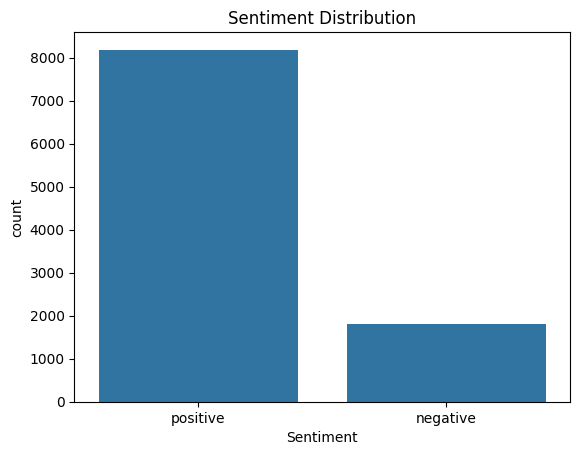

In [ ]:
data['Score'] = pd.to_numeric(data['Score'],errors='coerce')

data['Sentiment'] = data['Score'].apply(lambda x : "positive" if x > 3 else "negative")

sns.countplot(x='Sentiment', data=data)
plt.title("Sentiment Distribution")

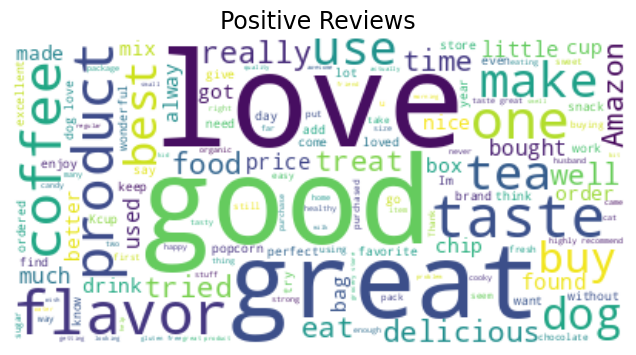

In [ ]:
def show_wordcloud(text, title):
  wc = WordCloud(background_color='white').generate(' '.join(text))
  plt.figure(figsize=(8,4))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title(title, fontsize=17)

show_wordcloud(data[data['Sentiment'] == 'positive']['Text'], "Positive Reviews")


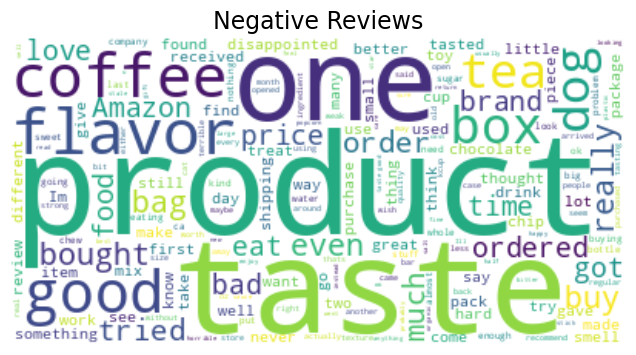

In [ ]:
show_wordcloud(data[data['Sentiment'] == 'negative']['Text'], "Negative Reviews")

Text(0.5, 1.0, 'Review length dist plot')

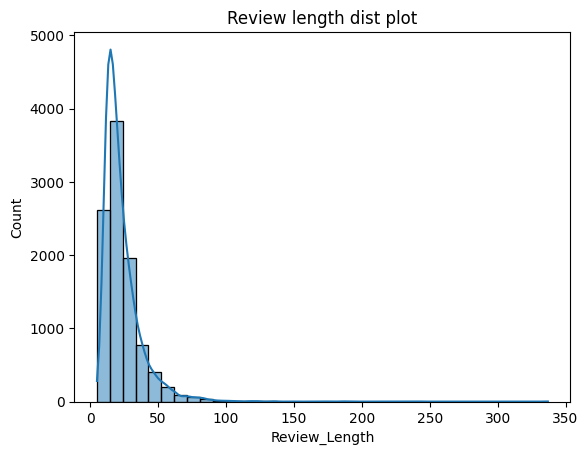

In [ ]:
data['Review_Length'] = data['Text'].apply(lambda x: len(x.split()))
sns.histplot(data['Review_Length'], bins=35, kde=True)
plt.title("Review length dist plot")

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(data['Text']).toarray()
y = data['Sentiment'].map({'positive':1, "negative":0})


print(f"Shape of. TF-IDF features : {X.shape}")



Shape of. TF-IDF features : (9998, 2000)


In [ ]:
# X[0][100:500]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Train Shape : {X_train.shape}")
print(f"Test Shape : {X_test.shape}")

Train Shape : (7998, 2000)
Test Shape : (2000, 2000)


In [ ]:
# normal, stand, vec, scALIONG - time intensive --- smaller p at once

In [ ]:
forest = RandomForestClassifier(n_estimators=150)
forest.fit(X_train, y_train)

y_pred_rf = forest.predict(X_test)
print("Random Forest Classification report : >>")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification report : >>
              precision    recall  f1-score   support

           0       0.86      0.41      0.55       371
           1       0.88      0.98      0.93      1629

    accuracy                           0.88      2000
   macro avg       0.87      0.70      0.74      2000
weighted avg       0.88      0.88      0.86      2000



In [ ]:
# from sklearn.model_selection import GridSearchCV

# params_grid_rf = {
#     "n_estimators":[100, 200, 300],
#     "max_depth" : [None, 10, 20 , 30],
#     "min_samples_split":[2,5,10],
#     "min_samples_leaf":[1,2,4]
# }

# rf = RandomForestClassifier()

# grid_rf = GridSearchCV(estimator=rf, param_grid=params_grid_rf, scoring='accuracy')
# grid_rf.fit(X_train, y_train)


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric ='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XG Boost Clssification report : >>")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XG Boost Clssification report : >>
              precision    recall  f1-score   support

           0       0.82      0.49      0.62       371
           1       0.89      0.98      0.93      1629

    accuracy                           0.89      2000
   macro avg       0.86      0.73      0.78      2000
weighted avg       0.88      0.89      0.87      2000



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data['Text'])

X_seq = tokenizer.texts_to_sequences(data['Text']) #text -> index
X_seq = pad_sequences(X_seq, maxlen=100)


X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.20)

In [ ]:
X_train_seq.ndim

2

In [ ]:
model_lstm = Sequential([
    Embedding(input_dim=2000, output_dim=64),
    LSTM(64, return_sequences = False),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, validation_split=0.20, verbose=2)

y_pred_lstm = (model_lstm.predict(X_test_seq) > 0.50).astype("int32")
print("LSTM Classification Report : >>")
print(classification_report(y_test_seq, y_pred_lstm))


Epoch 1/5
200/200 - 5s - 27ms/step - accuracy: 0.8357 - loss: 0.3945 - val_accuracy: 0.8888 - val_loss: 0.2773
Epoch 2/5
200/200 - 1s - 7ms/step - accuracy: 0.9114 - loss: 0.2241 - val_accuracy: 0.9062 - val_loss: 0.2436
Epoch 3/5
200/200 - 1s - 7ms/step - accuracy: 0.9376 - loss: 0.1674 - val_accuracy: 0.9056 - val_loss: 0.2728
Epoch 4/5
200/200 - 1s - 7ms/step - accuracy: 0.9508 - loss: 0.1385 - val_accuracy: 0.9031 - val_loss: 0.2762
Epoch 5/5
200/200 - 1s - 7ms/step - accuracy: 0.9622 - loss: 0.1159 - val_accuracy: 0.9000 - val_loss: 0.3160
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Classification Report : >>
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       347
           1       0.93      0.92      0.93      1653

    accuracy                           0.88      2000
   macro avg       0.79      0.80      0.80      2000
weighted avg       0.88      0.88      0.88      2000



In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

def build_lstm_model(hp):
  model = Sequential()
  model.add(Embedding(input_dim = 2000, output_dim=hp.Choice('embedding_dim',[32,64, 128])))
  model.add(LSTM(hp.Int("lstm_units", min_value=32, max_value=128, step=32)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


tuner = RandomSearch(
    build_lstm_model,
    objective = "val_accuracy",
    max_trials=10,
)

tuner.search(X_train_seq, y_train_seq, epochs=5, validation_split=0.20)

Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.9049999713897705

Best val_accuracy So Far: 0.9118750095367432
Total elapsed time: 00h 01m 36s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("best dim",best_hps.get("embedding_dim"))
print("best lstm unit",best_hps.get("lstm_units"))
# print(f"Best dim : {best_hps.get("embedding_dim")}")
# print(f"best lstm unit : {best_hps.get("lstm_units")}")

best dim 32
best lstm unit 64


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"Random Forest Accu :{accuracy_score(y_test, y_pred_rf)}")
print(f"XG Boost Accu :{accuracy_score(y_test, y_pred_xgb)}")
print(f"LSTM Accu :{accuracy_score(y_test_seq, y_pred_lstm)}")

Random Forest Accu :0.8775
XG Boost Accu :0.8865
LSTM Accu :0.8815


In [ ]:
def predict_sentiment(text, model, tokenizer=None, vectorizer=None):
  if tokenizer:    #deep learning model
    seq = tokenizer.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=100)
    pred = model.predict(seq)
  else:            #machine learning model
    vec = vectorizer.transform([text]).toarray()
    pred = model.predict(vec)
  return "Positive" if pred > 0.5 else "Negative"

In [ ]:
user_text = "do not love the product"

predict_sentiment(user_text, model_lstm,tokenizer=tokenizer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'Negative'

In [ ]:
# from typing import Union

# from fastapi import FastAPI

# app = FastAPI()


# @app.get("/")
# def read_root():
#     return {"Hello": "World"}


# @app.get("/items/{item_id}")
# def read_item(item_id: int, q: Union[str, None] = None):
#     return {"item_id": item_id, "q": q}


hyper tuning
api.
# docker pod
git - > aws(gcp)(azure). - deploy


locally = deploy your api locally 8000